In [ ]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('playstore-analysis.csv')

In [4]:
# Basic information about data

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
# checking for null values

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 1. Treating Missing Values 

### Dropping records where 'Rating' is missing since its important variable in analysis and can't be estimated. 

In [10]:
df.dropna(subset = ['Rating'], axis = 0, inplace = True)

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### Checking the Null Values for 'Android Ver'

In [12]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### Dropping 3rd record

In [13]:
# We can see that the 3rd record against index 10472 is not consistent with rest of data, so we are dropping that record.
# This row also makes up for the one null value in 'Content Rating' field.

In [14]:
df.drop([10472], inplace = True)

### Checking the Null Values for 'Current Ver'

In [15]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [16]:
# There are no inconsistencies so we can use this data.

### Replacing Missing values with Mode

In [17]:
# Decided to replace null values in Android Ver and Current Ver with the most common values in dataset i.e. mode.

In [18]:
# Mode of Android Ver
m1 = df['Android Ver'].mode()[0]

In [19]:
m1

'4.1 and up'

In [20]:
# Replacing the value
df['Android Ver'].fillna(m1, inplace = True)

In [21]:
# checking null values
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 

In [22]:
# Mode of Current Ver
m2 = df['Current Ver'].mode()[0]

In [23]:
m2

'Varies with device'

In [24]:
# Replacing the value
df['Current Ver'].fillna(m2, inplace = True)

In [25]:
# checking null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 2. Changing Datatypes

In [26]:
# checking data and current data types
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [28]:
# We can see right now only 'Rating' and 'Size' are float datatype but 'Reviews', 'Installs' and 'Price' columns also have 
# numeric data so we can convert them to same.

### Removing $ sign from 'Price' and converting it to float

In [29]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


### Removing ', ' and '+' sign from 'Installs' and converting to integer

In [31]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace("+",""))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


### Converting 'Reviews' to integer

In [33]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


### Converting 'Last Updated' in date datatype

In [35]:
from datetime import datetime

In [36]:
dfdate = []
for i in df['Last Updated']:
    dfdate.append(datetime.strptime(i, '%B %d, %Y'))

In [37]:
df['Last_Updated'] = dfdate

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20


## 3. Creating New Columns

### Extracting month from date

In [43]:
month = []
for m in df['Last_Updated']:
    month.append(m.strftime("%B"))

In [44]:
df['Month_of_update'] = month

In [45]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated,Month_of_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,June


### Extracting year from date 

In [46]:
year = []
for y in df['Last_Updated']:
    year.append(y.year)

In [47]:
df['Year_of_update'] = year

In [48]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated,Month_of_update,Year_of_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,January,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,January,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,August,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,June,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,June,2018


In [49]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated,Month_of_update,Year_of_update
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,2017-06-18,June,2017
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,2017-07-25,July,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,2018-07-06,July,2018
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,2015-01-19,January,2015
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,2018-07-25,July,2018


## 4. Removing Duplicate Columns

### Dropping original 'Last update' column

In [52]:
df.drop(['Last Updated'], axis = 'columns', inplace = True)

In [53]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Month_of_update,Year_of_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018-01-07,January,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01-15,January,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018-08-01,August,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018-06-08,June,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018-06-20,June,2018


## 5. Sanity Check

#### Rating should be between 1-5 as these are the only ratings allowed by play store.

In [55]:
df[df['Rating']<1] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Month_of_update,Year_of_update


In [56]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Month_of_update,Year_of_update


In [57]:
# As we see above there are no such records where ratings are outside the range. Therefore, we don't need to drop any record. 

#### Reviews should not be more than installations

In [65]:
# Only people who have installed and used the app should review it hence, number of reviews can't be more than installations.
# We will drop records where reviews are more than installs.

In [60]:
sum(df['Reviews']>df['Installs'])

7

In [62]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Month_of_update,Year_of_update


In [63]:
df.drop(index=df[df['Reviews']>df['Installs']].index,inplace=True)

In [64]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Updated,Month_of_update,Year_of_update


# Data Visualization

## 1. Distribution of Ratings

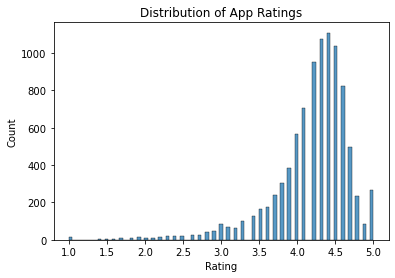

In [69]:
sns.histplot(df['Rating'])
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# We can see most of the apps have rating around 4.5. Very few apps get the rating below 3.

## 2. Top Categories with highest average Ratings

#### Total Unique Categories

In [80]:
x = df.Category.unique()
print(x)
print(len(x))

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
33


In [83]:
# There are 33 unique categories of apps available on Google Play store

#### Top 10 categories in terms of average ratings

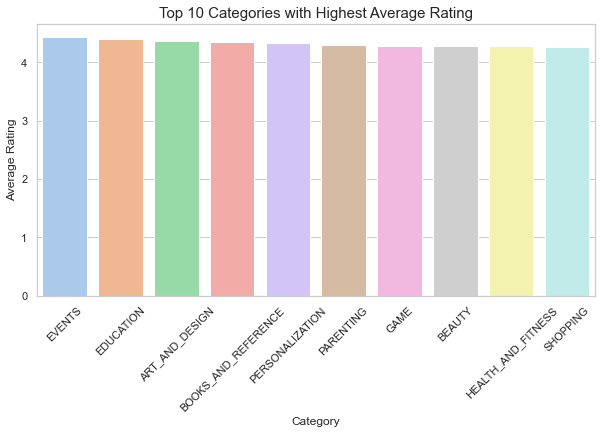

In [87]:
# Top 10 categories 
top_categories = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

# Setting color palette
sns.set(style = "whitegrid", palette = "pastel")

# Creating the plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)

# Naming the plot
plt.title('Top 10 Categories with Highest Average Rating', fontsize = 15)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

# Displaying the figure
plt.show()

In [72]:
# Events is the top category with highest average ratings, closely folllowed by Education and Art and design. 

## 3. Most Popular Categories in terms of number of apps available

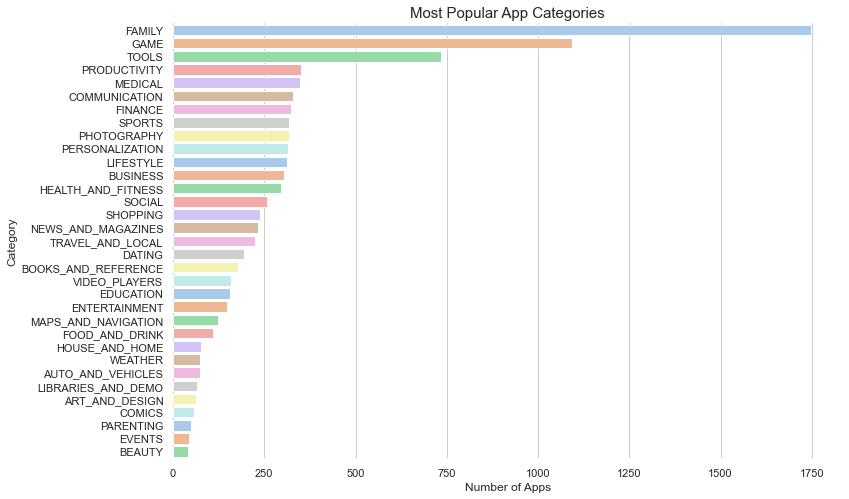

In [89]:
# Count of each category
category_counts = df['Category'].value_counts()

# Setting the color palette and minimal style
sns.set(style="whitegrid", palette="pastel")

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="pastel")

# Customizing the plot
plt.title('Most Popular App Categories', fontsize=15)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Removing unnecessary plot elements
sns.despine(left=True, bottom=True)

# Displaying the plot
plt.show()

In [90]:
# There are lot of apps related to family category followed by gaming apps. 
# Whereas there aren't many apps for in the events and beauty category although both these categories were in top 10 categories 
# with high average ratings which could mean there few such apps but are highly liked by users. 

## 4. Categories with highest installations

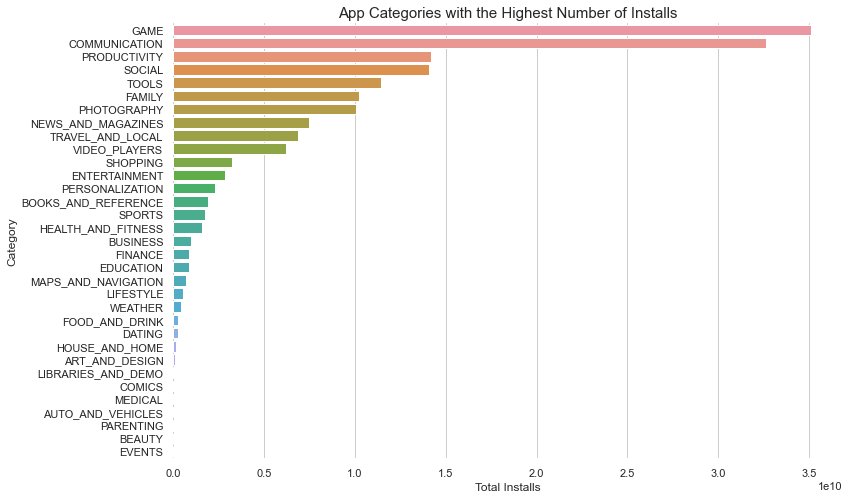

In [92]:
# Calculating the total installs per category
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Setting the color palette and minimal style
sns.set(style="whitegrid", palette="pastel")

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=category_installs.values, y=category_installs.index)

# Customizing the plot
plt.title('App Categories with the Highest Number of Installs', fontsize=15)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Removing unnecessary plot elements
sns.despine(left=True, bottom=True)

# Showing the plot
plt.show()

In [93]:
# Most popular category of apps on Google Play store are gaming apps. 
# People also like apps helping with communication and better productivity.

## 5. Popular Content Rating based on number of Apps 

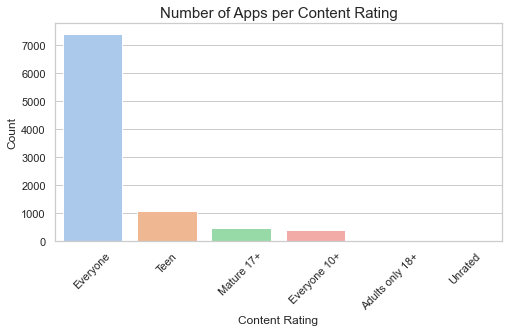

In [94]:
# Setting the color palette and minimal style
sns.set(style="whitegrid", palette="pastel")

# Creating plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Content Rating', data=df, order=df['Content Rating'].value_counts().index)

# Naming the plot
plt.title('Number of Apps per Content Rating', fontsize = 15)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Showing the figure
plt.show()

In [95]:
# Most of the apps available are created for use by everyone.

## 6. No. of installs by Content Rating

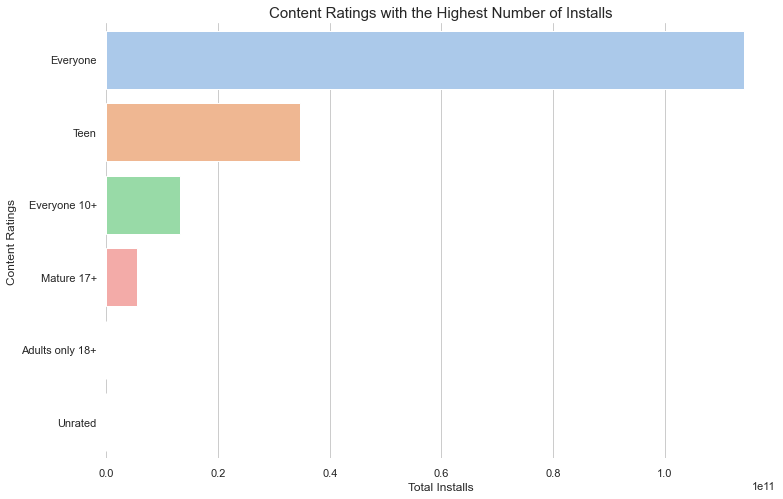

In [100]:
# Calculating the total installs per content rating
content_rating_installs = df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)

# Setting the color palette and minimal style
sns.set(style="whitegrid", palette="pastel")

# Creating the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=content_rating_installs.values, y=content_rating_installs.index)

# Customizing the plot
plt.title('Content Ratings with the Highest Number of Installs', fontsize=15)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('Content Ratings', fontsize=12)

# Removing unnecessary plot elements
sns.despine(left=True, bottom=True)

# Showing the plot
plt.show()

In [101]:
# Most installs are also made of apps with content category 'everyone' followed by 'teens' and most available have these content ratings.

## 7. Free vs Paid Apps

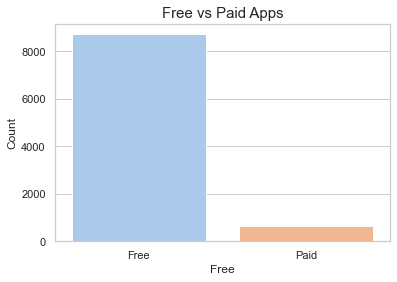

In [97]:
# Setting the color palette and minimal style
sns.set(style="whitegrid", palette="pastel")

# Creating plot
sns.countplot(x='Type', data = df)

# Naming the plot
plt.title('Free vs Paid Apps', fontsize = 15)
plt.xlabel('Free')
plt.ylabel('Count')

#  Showing the figure
plt.show()

In [99]:
# Majority of the apps are available for free for the users and very few are paid apps.

## 8. App size vs No. of Installs

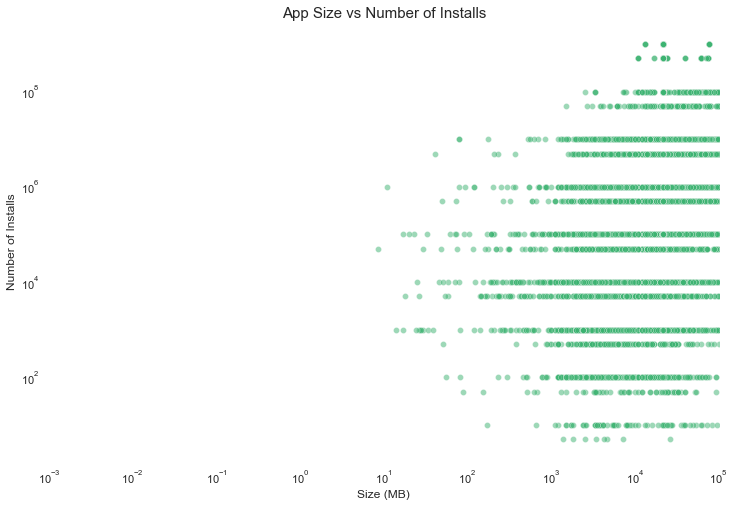

In [102]:
# Setting the color palette and minimal style
sns.set(style="white", palette="pastel")

# Creating the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="Size", y="Installs", alpha=0.5, color='mediumseagreen')

# Customizing the plot
plt.title('App Size vs Number of Installs', fontsize=15)
plt.xlabel('Size (MB)', fontsize=12)
plt.ylabel('Number of Installs', fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.001, df["Size"].max())

# Removing unnecessary plot elements
sns.despine(left=True, bottom=True)

# Showing the plot
plt.show()

## 9. Most Common Android Ver and number of installs of each version

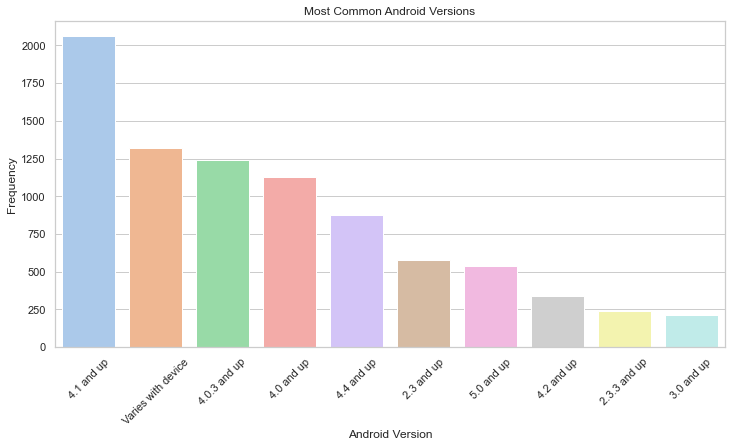

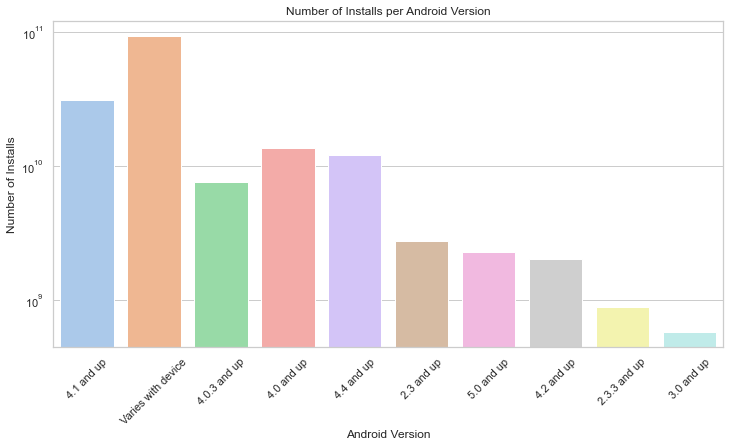

In [104]:
# Counting the frequency of each minimum Android version
min_android_counts = df['Android Ver'].value_counts().head(10)

# Calculating the total number of installs for each minimum Android version
min_android_installs = df.groupby('Android Ver')['Installs'].sum().loc[min_android_counts.index]

# Creating a DataFrame with counts and installs
min_android_df = pd.DataFrame({'Counts': min_android_counts, 'Total Installs': min_android_installs})

# Creating a bar plot for the most common minimum Android versions
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.barplot(x=min_android_df.index, y='Counts', data=min_android_df)
plt.title('Most Common Android Versions')
plt.xlabel('Android Version')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Creating a bar plot for the number of installs per minimum Android version
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.barplot(x=min_android_df.index, y='Total Installs', data=min_android_df)
plt.title('Number of Installs per Android Version')
plt.xlabel('Android Version')
plt.ylabel('Number of Installs')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

In [105]:
# Most common android version is 4.1 and up but most installs are made for apps which have android version which varies with device.